# Session 3
In the previous two sessions, we've rattled through most of the basic building blocks of `python` code. In your lectures, you'll go through more detailed examples of particular computational methods. Learning them will come down to practice in the end. Don't be afraid to experiment with code in the afternoon sessions, and when you get stuck, as well as asking the lecturers, remember google is your friend! I find out new things all the time by researching `python` online.

In this session we'll talk about N-dimensional `arrays`, look at plotting 2D data, and discuss using and plotting data from a common astronomical format - the FITS file.

As always, if you're using `python2`, run the code below to get into the future.

In [ ]:
from __future__ import division,print_function,absolute_import

## N-dimensional `arrays`
Sometimes it makes sense to store data two or higher dimensions. For example, if we want to perform a 2D Fast Fourier Transform, it makes sense to store it in two dimension. We can make an N-dimensional `array`b use the `shape` attribute. Try running and reading the code below:

In [ ]:
from numpy import arange
##Remember, inputting n into arange creates 
##an array from 0 up to n-1
a = arange(9)
print(a)
##let's print a line to separate the outputs
print('-------')
##Use the shape attribute to make 2D
a.shape = (3,3)
print(a)

By setting the attribute `shape` to `(3,3)`, we change `a`into a 3$\,\times\,$3 `array`. Incidentally, `(3,3)` is another data type know as a `tuple`. Tuples consist of values, separated by commas `,`, surrounded by parentheses `()`. They seem similar to `lists` at first, but the major difference is that a tuple is 'immutable', which means you can't change the contents once you create it. `lists` are mutable because you can alter the contents.

We can access elements of the array just like a 1D array, but now we need two indexes to specify a location (kind of like an $x,y$ coordinate). Both axis are zero indexed, so we access the first element of the array like this `a[0,0]`.

If we think of the horizontal direction as `x`, and the vertical as `y`, the indexing works like this:

$$
\begin{array}{ccc} 
[[y_0,x_0 & y_0,x_1 & y_0,x_2] \\ 
[y_1,x_0 & y_1,x_1 & y_1,x_2] \\ 
[y_2,x_0 & y_2,x_1 & y_2,x_2]] \\ 
\end{array} 
$$

Where $y_1,x_0$ means you would mean access the element via `a[1,0]`. Importantly, the first index you enter is for the `y` axis. You can think of the dimension as having an 'order', where the $x$ dimension is the first order, and $y$ the second order dimension. When you go above 2 dimensions the dimensional index ordering goes like $n,n-1,\,...,\,1$ where $n$ is the number of dimensions. The same ordering applies when creating the shape of the `array`. Run the code below to get a feel for how this works.

In [ ]:
b = arange(12)
b.shape = (4,3)
print(b)
print('Index 0,2 is element value',b[0,2])
print('Index 3,1 is element value',b[3,1])

***
## <font color=blue>Exercise 3.1<font>
Create an array using `arange` that has 15 elements. Give it a shape where there are 5 elements in the horizontal direction, and 3 in the vertical. Write a print function that calls the element equal to 4, and another that calls the element equal to 11. Use the box below


***

### Slicing
It's often useful to access just certain parts of an array that we want to work on. An efficient way to do this is to 'slice' the array, which accesses multiple elements of the array simultaneously. Read and run the code below to look at slicing

In [ ]:
a = arange(10)
print('Full array is',a)

##Slicing uses a semicolon in the indexing 
##adding n:m makes a subsection of the array
##starting at element n, up to element m-1

print('a[1:4] gives',a[1:4])
print('a[3:8] gives',a[3:8])

There are a couple of other quick slicing and indexing tricks. Check out the table below for some examples (where we use a 1D `array` called `a`. Try them out in the code box below

|Syntax| Effect|
|:-|:-|
|`a[n:]` | Access the elements from `n` up to the end of the array |
|`a[:n]` | Access the elements from the start of the array up to and including the element `n-1` |
|`a[-1]` | Access the very last element in the array |
|`a[::-1]`|Reverse the order of the elements in the array



## <font color=blue>Exercise 3.2<font>
You can slice in 2D as well! See if you can work out the syntax for how. First off, create an array called `awesome_array` which is a `(4,5)` `array` with elements like this:
    
```python
print(`awesome_array`)
```
```
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
```
then do a slice operation to access these elements
```
[[ 7  8  9]
 [12 13 14]]
 ```
`print` your answer to make sure it's correct.

***
You can use slicing to assign new values to elements. You can either set multiple elements equal to a single value, or another `array` which is the same size as the slice you are making. Try the following code out:

In [ ]:
from numpy import zeros,array

##zeros is a conveience function from numpy
##it creates an array of zeros in whatever shape you want
##the code below makes a 4x4 array of zeros
test_array = zeros((4,4))
print('This is the test array')
##The '\n' is a return carriage - starts a print on a new line
print(test_array,'\n')

##Set all the elements selected by the slice to 2
test_array[1:3,1:3] = 2
print("After setting some elements to 2")
print(test_array,'\n')

sub_array = array([1,2,3,4])
sub_array.shape = (2,2)

##Now set the same elements to the
##smaller array we just created
test_array[1:3,1:3] = sub_array

print("After setting the same elements to sub_array")
print(test_array,'\n')

### Truth testing arrays
Logic testing works slightly differently on arrays, as they can have multiple elements. For example, imagine you had some basic data on a number of galaxies that said whether they were 'blue' or 'red', and their stellar mass $M_\odot$ (to keep things simple let's have 10 galaxies):

```python
colours = array(['red','red','blue','red','blue','blue','red','red','red','blue'])
masses = array([2.3e8,4.2e7,5.8e8,1.6e7,3.8e7,3.8e9,8.6e6,9.3e5,6.9e10,3.5e8])
```

Say you only wanted to access data from red galaxies. You can use the Comparison Operator to find where this condition is met, and return an array containing either `True` or `False`. Try it below

In [ ]:
##Some fake data
colours = array(['red','red','blue','red','blue','blue','red','red','red','blue'])
masses = array([2.3e8,4.2e7,5.8e8,1.6e7,3.8e7,3.8e9,8.6e6,9.3e5,6.9e10,3.5e8])

print(colours == 'red')

Happily, you can actually access elements within an `array` using Booleans (`True` or `False` here). If you use an `array` of the same length as `colours`, containing `True` or `False`,  to access elements within `colours`, you only return the elements corresponding to `True`. Which means we can use the same logic test to call elements of another array, e.g. `masses`. Try the code below and make sure you understand what is happening here:

In [ ]:
print('Full colours',colours)
print('Full masses',masses,'\n')

print('Only red',colours[colours == 'red'])
print('Masses of red galaxies',masses[colours == 'red'])

There is a nice little trick that allows you to apply multiple criteria as the same time. Imagine you want to select all the red galaxies that are also over $10^9_\odot$. You can do that with the following syntax:
```python
masses[(colours == 'red') & (masses > 1e9)]
```
The important thing to note here is the parentheses `()` around each logic test - *without them this won't work*. Don't worry for now about why - but by added the `()`, and combining the logic tests with the ampersand `&`, you can add multiple logic tests. Try running it below and check the result against the original data to see if it makes sense.


In [ ]:
print(masses[(colours == 'red') & (masses > 1e9)])

***
## <font color=blue>Exercise 3.3<font>
There is a useful function for generating $x$ and $y$ coordinates in 2D arrays called `meshgrid`. Imagine you wanted to create a 5$\times$5 `array` with $x$ and $y$ coordinates that ranged from -2 to 2 inclusive. You could use `meshgrid` like so:

```python
from numpy import meshgrid
x_range = arange(-2,3)
y_range = arange(-2,3)

x_mesh,y_mesh = meshgrid(x_range,y_range)

print(x_mesh,'\n')
print(y_mesh)
```
```
[[-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]] 

[[-2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1]
 [ 0  0  0  0  0]
 [ 1  1  1  1  1]
 [ 2  2  2  2  2]]
```

So x_mesh is now a 5$\times$5 `array` that contains the `x` coordinates that we want to associate with an output array.

Use the `meshgrid` functionality to define a `function` that can create a simple 'circle' array, like the below. This is a 13$\times$13 array of zeros, with a 'circle' of ones within that has a radius of 5. Complete the code below to create this output. You may want to make use of the `sqrt` function, which finds the square root of a number or `array`.

```
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
```

In [ ]:
from numpy import sqrt
from numpy import meshgrid

grid_edge = 13
radius = 5

##Finish off this function
def make_circle(radius,grid_edge):
    ##Don't forget to add a doc string
    
    ##Setup a sensible range for x and y, and then
    ##meshgrid them to get coordinates
    x_range = 
    y_range = 
    x_mesh, y_mesh = 
    
    ##Make a circle array that matches the one shown above,
    ##using x_mesh and y_mesh
    ##This doesn't has to happen in one line
    circle = 
        
    return circle

circle = make_circle(radius,grid_edge)

print(circle)

## Plotting in 2D
We made a circle, but it doesn't look great just printed out. Let's plot it in 2D! I'm going to take this opportunity to introduce some general plotting tips - read the comments, understand the code, and then run the code below to see your plot. You can use this plotting code in the future, and adapt it to your needs. There are *lots* of plotting examples online (an example is [here](https://matplotlib.org/2.0.0/examples/pylab_examples/subplots_demo.html)). Once you get comfortable, it's worth investing time in researching how to make good plots; it's an excellent way to

In /home/jline/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jline/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jline/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/jline/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jline/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

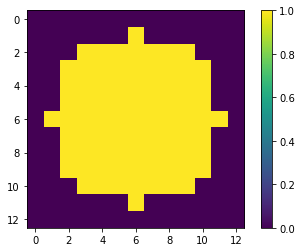

In [1]:
%matplotlib inline
from numpy import array
import matplotlib.pyplot as plt

##Make our 2D circle array
circle = array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
 [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
 [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
 [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
 [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
 [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
 [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
 [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
 [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

##This creates a matplotlib figure object
##We will create our plot within this
fig = plt.figure()

##This add an axis object - we add it to the figure
ax = fig.add_subplot(111)

##The imshow method plots things in 2D
##We use the imshow method to return image
##We can use image to plot a colorbar
image = ax.imshow(circle)

##This adds a colorbar - the colorbar
##explains the relationship between the
##colour scale and the values it represents
fig.colorbar(image)

plt.show()

***
## Inputting data, reading and writing
Eventually it becomes useful to be able to add variables on the command line, instead of opening up and editing your code every time. There are a few ways of doing this - I'll mention two here. The simplest way is to use the input command. This is an interactive way of inputting variables. Run the code below to see how this works - follow the prompts that appear.

In [ ]:
def simple_print(a,b):
    print('You entered',a,'for the value of a')
    print('You entered',b,'for the value of b')
    
a = input('Enter a value for a: ')
b = input('Enter a value for b: ')

simple_print(a,b)

To use the `input` command you pass a `string` to be printed on the command line (or interactive prompt or however you are running `python`, that tells the use what to input. This is good for when you only need to input a few simple things. Running many input commands can get user intensive, and if they make a mistake they have to start again.

I would say it's better to use `argparge`, which is a module that allows you to craft custom arguments (more information [here](https://docs.python.org/3/library/argparse.html)). Importantly, you can automatically read in arguments to whatever type you want (i.e. as a `float` or a `string`), and you can set optional arguments and defaults. This gives your code flexibility and functionality.

Using a text editor, open up `using_argparse.py`. Read the code, but the most important thing to look at are these lines:

```python
parser = argparse.ArgumentParser()
parser.add_argument('--a',type=float,default=1,help='Enter a value for a, which will be a float')
parser.add_argument('--b',type=float,default=1,help='Enter a value for b, which will be a float')
parser.add_argument('--c',type=float,default=1,help='Enter a value for c, which will be a float')
parser.add_argument('--d',type=float,default=0,help='Enter a value for d, which will be a float')

args = parser.parse_args()
    
a = args.a
b = args.b
c = args.c
d = args.d
```

These lines mean I have defined arguments that I can pass on the command line, for `a,b,c,d`. I have defined them to be `floats`, and I have set the defaults so that `a=1,b=1,c=1,d=0`. You don't have to use argparse yet, but it's good to know about it. I can now use `using_argparse.py` on the command line/anaconda prompt like this:

```jline@apstraho:~/Dropbox/work/KAS18_python/Session3$ python using_argparse.py --a=-2 --b=-3 --c=2 --d=15```

Try opening up a terminal or the anaconda prompt in the folder Session3, and typing in `python using_argparse.py --a=-2 --b=-3 --c=2 --d=15`. You should get a plot popping up. The good thing is that you were able to supply new values to variables inside the code, without editing the code. We won't talk about this anymore, but you should remember this for the future.

## Reading in external data
Say we want to read in some external data so we can work with it. There are a number of ways, but we'll just use `loadtxt` from the `numpy` package for now. In the `Session3` folder there is a text file called `test_data.txt`. Open it up with a text editor and have a look at it. We can read it into the computer using the following code. Run the box below and check the output makes sense. <font color=red>You must make sure the notebook you are running is in the same folder as the text file otherwise this won't work.<font>

In [ ]:
from numpy import loadtxt
data = loadtxt('test_data.txt')
print(data)

So we have read the data and turned in into an `array`. This is super useful for doing calculations on saved data. There is a similar command, `savetxt`, that saves an `array` to a text file. Run the code below, and then use  text editor to open up and read `test_data_times_2.txt`, which you will have created.

In [ ]:
from numpy import savetxt
new_data = 2*data
savetxt('test_data_times_2.txt',new_data)
print(new_data)

Make sure that the `array` you just printed matches what you just saved.

<font color=red> WARNING - `loadtxt` needs the data in the text file to be regular, i.e. in a $N \times M$ layout, just like an array. This makes it limited for more complicated text files which are irregular.<font>

If you need to read in more complicated data, you may need to use the `open` function - you can read about that [here](http://www.pythonforbeginners.com/files/reading-and-writing-files-in-python).

In the `Session3` folder, you should be able to see the file `spectrum.txt`. This contains data about a quasar which I downloaded from [here](https://archive.stsci.edu/prepds/composite_quasar/). A quasar in an extremely bright luminous astronomical object (and they are cool!). Let's read in the data, and plot the spectra (the brightness as a function of frequency) for this quasar. Run the code in the box below.

In [ ]:
%matplotlib inline
from numpy import loadtxt
import matplotlib.pyplot as plt

##This line reads in the file spectrum.txt, and turns it into
##a numpy array
quasar_data = loadtxt('spectrum.txt')

##There are 4 columns in spectrum.txt. We want the first
##and second columns - we use a slice here

##This slice takes the first column
wavelengths = quasar_data[:,0]
##This slice takes the second column
fluxes = quasar_data[:,1]


##Below I've added some more plotting commands - check them out
fig = plt.figure()

##Add an axis to the figure to plot our data on
ax = fig.add_subplot(111)

##Plot the data
ax.plot(wavelengths,fluxes,'k-',label='Quasar spectra')

##Set the x,y labels, fontsizes
ax.set_xlabel('Rest Wavelength ($\AA$)',fontsize=14)
ax.set_ylabel('Relative Flux',fontsize=14)

##Set the range of the x and y axis to be plotted
ax.set_xlim(1000,3000)
ax.set_ylim(0,10)

##Show the plot
plt.show()

Sweet! That's a cool looking plot, and it only took us three lines to load the data.

## <font color=blue> Exercise 3.4 <font>
In the `Session3` folder there is a text file `cool_image.txt`. Read in the data in this file using `loadtxt`, and plot it using `ax.imshow` like the code in the previous boxes. Copy that code and edit it to plot the data in `cool_image.txt`. Use the box below to write the code.
<font color=red>Optional extension <font> - change the colour map of the plot to get a black and white plot (hint google the `cmap` keyword for `imshow`.)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import loadtxt


## FITS files
Astronomical images and data are often stored in what's called a FITS file. Opening up the FITS file and understanding the data inside is a bit of a dark art and usually you only learn how to do it if you have to. I'm just mentioning this here so you know about it and have an example. There is a large amount of online documentation  [here](http://docs.astropy.org/en/stable/io/fits/index.html?highlight=FITS) to check out if you need to. Have the example below as a introduction guide. We'll be plotting the famous radio galaxy Fornax A. Inside the `Session3` folder you can find 'NGC_1316_I_20cm_fev1989_i.fits' which is a FITS file. I found this FITS file by searching on the NASA/IPAC Extragalactic Database (NED - see [here](http://ned.ipac.caltech.edu/ui/?q=imageservice&objname=fornax%20A)). The image came from this research [here](http://adsabs.harvard.edu/cgi-bin/bib_query?1989ApJ...346L..17F). First off, we open the file, and then `print` out some information about the file.

In [ ]:
##We use the fits class inside astropy
from astropy.io import fits

##We use the open method in fits to read in data from
##the fits file
hdus = fits.open('NGC_1316_I_20cm_fev1989_i.fits')

print(hdus.info())

OK, so there's a large of information. HDU means Header Data Unit, which is the highest level component of the FITS file structure. You can have multiple HDUs in a single FITS file - in this example we only have one. Most important here is the 'Dimensions' Column, which shows `(512, 512, 1, 1)`. This means we data of that shape, so a 4-dimensional data set. Often FITS files come with multiple frequency slices, so even though we are going to plot a 2D image, there a 4 Dimensions to the data. Next, we access the data inside the `hdus` object we made earlier. Run the code and look at the output.

In [ ]:
##Because you can have more than one hdu, hdus is actually a list
##To acces the first (and only) hdu, use hdus[0]
hdu1 = hdus[0]
##The data inside hdu1 is an attribute called data
data = hdu1.data
##data is a numpy array
print(data.shape)

Note that the dimensions of the data are reported by `astropy` in the opposite order to that in the FITS file. This is annoying but unavoidable. We can use the data `array` to do any kind of science we want with this galaxy - find the maximum brightness, the rms across the galaxy, all kinds of stuff. We're just going to plot it.  Now, finally, we'll pull out the relevant data and plot it with `imshow`.

In [ ]:
##OK, we want to plot a 2D array, so we slice data
##to make it 2D
data = data[0,0,:,:]

##Now we plot and succeed
%matplotlib inline
import matplotlib.pyplot as plt

##This creates a matplotlib figure object
##We will create our plot within this
fig = plt.figure(figsize=(10,10))

##This add an axis object - we add it to the figure
ax = fig.add_subplot(111)

##The imshow method plots things in 2D
##We use the imshow method to return image
##We can use image to plot a colorbar
##vmin and vmax set the lower and upper
##bounds of the colour scale
##we add origin='lower' because numpy arrays have a zero
##top left - FITS files have 0 bottom left, so we need
##to flip the image
image = ax.imshow(data,vmin=0,vmax=0.025,origin='lower')

##This adds a colorbar - the colorbar
##explains the relationship between the
##colour scale and the values it represents
fig.colorbar(image)

plt.show()

Oooooo lovely radio galaxy. However, the xlabels and ylabels mean nothing, because they are just pixel values. There are a million ways to make this plot look better, but there is a nice package out there already, called `aplpy`.

I won't talk through how this plotting works as this is getting very specialised, and `aplpy` is clunky. If you want to run this code you'll need to install `aplpy`, so I've included the plot below in case you don't want to do it. Hopefully you'll agree this plot is far clearer, more attractive, and includes the RA and Dec coordinate information. 

In [ ]:
import aplpy
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

f = aplpy.FITSFigure('NGC_1316_I_20cm_fev1989_i.fits',figure=fig)

f.add_grid()
f.grid.set_linewidth(1.0)
f.grid.set_linestyle('dashed')
f.grid.set_alpha(0.3)
f.grid.show()

f.show_colorscale(cmap='viridis')
f.axis_labels.set_font(size=18)
f.tick_labels.set_font(size=18)
f.tick_labels.set_xformat('hh:mm:ss')
f.tick_labels.set_yformat('dd:mm:ss')

plt.show()
fig.savefig("nice_fornaxA_plot.png",bbox_inches='tight')


Below is what the plot should look like. OK that's it, the end of my notebooks. I hope you had fun and wish you many years of excellent `python` coding in the future!
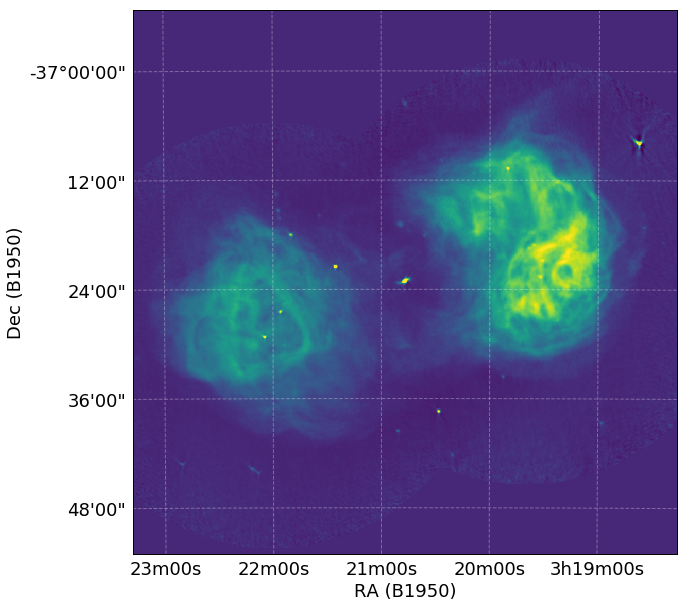